In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('unique750.csv')
X = df[['creatinine','temperature', 'meanbp', 'fio2/pao2', 'GCS', 
              'bicarbonate', 'saps_score', 'vent', 'ethnicity', 'lymphoma', 'hepaticfailure']]

y = df['unitdischargestatus']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1357, 11) (1357,)
Test (340, 11) (340,)


Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 95.29
Accuracy: 0.956 (0.013)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
model_cv_score = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, yhat))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, yhat))
print('\n')
print("=== All AUC Scores ===")
print(model_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic Regression: ", model_cv_score.mean())

=== Confusion Matrix ===
[[  5  15]
 [  1 319]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.25      0.38        20
           1       0.96      1.00      0.98       320

    accuracy                           0.95       340
   macro avg       0.89      0.62      0.68       340
weighted avg       0.95      0.95      0.94       340



=== All AUC Scores ===
[0.89969136 0.82021605 0.88657407 0.79166667 0.95679012 0.84645062
 0.69013112 0.92546584 0.8439441  0.89751553]


=== Mean AUC Score ===
Mean AUC Score - Logistic Regression:  0.8558445479641132


15 = FP = a expired result will be given when the true value is alive

1 =FN = a alive result will be given when the true value is expired

Random Forest

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10,scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[  3  17]
 [  3 317]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.15      0.23        20
           1       0.95      0.99      0.97       320

    accuracy                           0.94       340
   macro avg       0.72      0.57      0.60       340
weighted avg       0.92      0.94      0.93       340



=== All AUC Scores ===
[0.76813272 0.88310185 0.97299383 0.82908951 0.9691358  0.7804784
 0.57177364 0.85520186 0.91809006 0.83928571]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8387283375508012


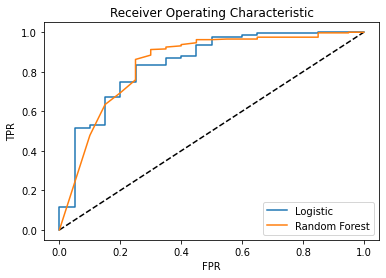

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob1 = model.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = rfc.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()